# Ford GoBike System Data

## 1. Introduction

Ford GoBike or Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area established in 2013. Till January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. And Ford GoBike is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. 

In this project, data visulization will be performed by using univariate, bivariate, and multivariate plots to explore the Ford GoBike users behaviour during current pandemic situation from Apr to Aug 2020, some of the patterns such as trip usage throughout hour of day, day of week etc will be compared with dataset from Apr to Aug 2019. Those observation could be beneficial for Ford GoBike's operation optimization and allocate sufficient resources during the time of day and day of each week. 

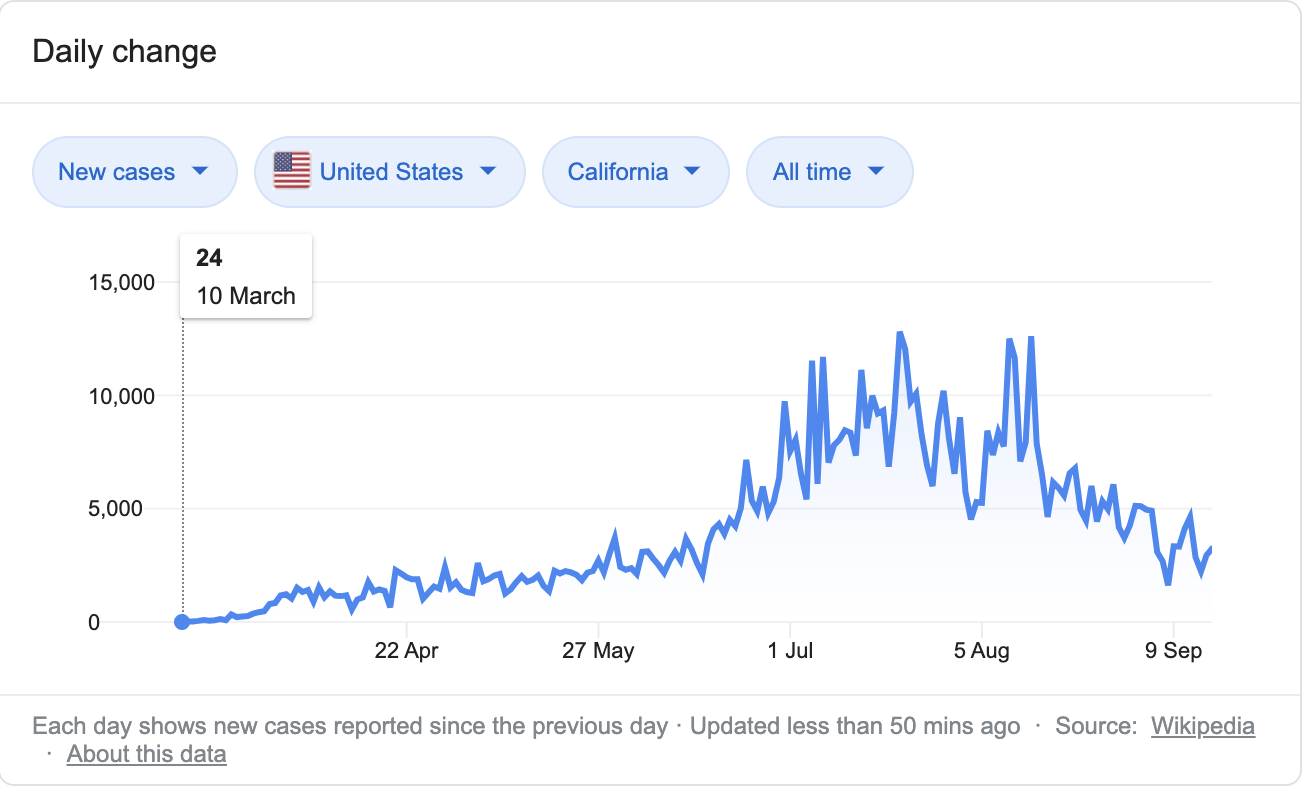

In [1]:
# Covid-19 cases in Califonia 
from IPython.display import Image
Image(filename='covid-case.PNG', width=500, height=300)

In [2]:
# Import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.parser import parse
from datetime import datetime, timedelta

%matplotlib inline

In [3]:
# Loaded all files from Apr to Aug 2020 and merge them into df_2020
df1 = pd.read_csv('202004-baywheels-tripdata.csv')
df2 = pd.read_csv('202005-baywheels-tripdata.csv')
df3 = pd.read_csv('202006-baywheels-tripdata.csv')
df4 = pd.read_csv('202007-baywheels-tripdata.csv')
df5 = pd.read_csv('202008-baywheels-tripdata.csv')

frames = [df1, df2, df3, df4, df5] 

df_2020 = pd.concat(frames)

**Each trip is anonymized and includes:**

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

## 2. Data Cleaning

In [4]:
# Investigate the stucture of dataset
df_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,NaN
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,NaN
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,NaN
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,NaN
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,NaN


In [5]:
# Check the missing data and number of data entries
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688091 entries, 0 to 152445
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             688091 non-null  object 
 1   rideable_type       688091 non-null  object 
 2   started_at          688091 non-null  object 
 3   ended_at            688091 non-null  object 
 4   start_station_name  446764 non-null  object 
 5   start_station_id    446764 non-null  float64
 6   end_station_name    435544 non-null  object 
 7   end_station_id      435544 non-null  float64
 8   start_lat           688091 non-null  float64
 9   start_lng           688091 non-null  float64
 10  end_lat             687053 non-null  float64
 11  end_lng             687053 non-null  float64
 12  member_casual       688091 non-null  object 
 13  is_equity           138251 non-null  object 
dtypes: float64(6), object(8)
memory usage: 78.7+ MB


In [6]:
# Use function to calculate distance (km) from start and end station 
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))
# Create distance column in the dateset
df_2020['dist'] = \
    haversine(df_2020['start_lat'], df_2020['start_lng'], df_2020['end_lat'], df_2020['end_lng'])
df_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,dist
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,NaN,1.236625
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,NaN,0.000000
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,NaN,0.008790
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,NaN,0.870057
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,NaN,1.454724


In [7]:
# Extract year, month, week, hour and duration from started_at
df_2020['started_at'] =  pd.to_datetime(df_2020['started_at'])
df_2020['ended_at'] =  pd.to_datetime(df_2020['ended_at'])
df_2020['start_month'] = df_2020['started_at'].dt.strftime('%B')
df_2020['start_week'] = df_2020['started_at'].dt.strftime('%A')
df_2020['start_hour'] = df_2020['started_at'].dt.hour
df_2020['duration'] = df_2020['ended_at'] - df_2020['started_at']
df_2020['duration_sec'] = df_2020[:]['duration'] / np.timedelta64(1, 's')
df_2020['duration_min'] = df_2020[:]['duration'] / np.timedelta64(1, 'm')
df_2020['duration_hour'] = df_2020[:]['duration'] / np.timedelta64(1, 'h')
df_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,is_equity,dist,start_month,start_week,start_hour,duration,duration_sec,duration_min,duration_hour
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,...,casual,NaN,1.236625,April,Saturday,8,00:05:14,314.0,5.233333,0.087222
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,...,casual,NaN,0.000000,April,Friday,18,00:25:22,1522.0,25.366667,0.422778
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,...,casual,NaN,0.008790,April,Saturday,15,00:01:17,77.0,1.283333,0.021389
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,...,casual,NaN,0.870057,April,Friday,20,01:47:03,6423.0,107.050000,1.784167
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,...,casual,NaN,1.454724,April,Friday,18,00:07:40,460.0,7.666667,0.127778


In [8]:
# Drop columns irrelevant to this analysis
df_2020.drop(['start_station_id', 'start_station_name', 'start_lat', 'start_lng','duration',
              'end_station_id', 'end_station_name','end_lat', 'end_lng','is_equity','started_at', 'ended_at'], 
        axis=1, inplace=True)
df_2020.head()

,ride_id,rideable_type,member_casual,dist,start_month,start_week,start_hour,duration_sec,duration_min,duration_hour
0,5A1FF31692371859,electric_bike,casual,1.236625,April,Saturday,8,314.0,5.233333,0.087222
1,D8D5BA2D4F051133,electric_bike,casual,0.000000,April,Friday,18,1522.0,25.366667,0.422778
2,A3633A9140CA4FF8,electric_bike,casual,0.008790,April,Saturday,15,77.0,1.283333,0.021389
3,301F57EB0197A5E0,electric_bike,casual,0.870057,April,Friday,20,6423.0,107.050000,1.784167
4,9429C701AF5744B3,electric_bike,casual,1.454724,April,Friday,18,460.0,7.666667,0.127778


In [9]:
# Check the columns are dropped and number of missing data
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688091 entries, 0 to 152445
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ride_id        688091 non-null  object 
 1   rideable_type  688091 non-null  object 
 2   member_casual  688091 non-null  object 
 3   dist           687053 non-null  float64
 4   start_month    688091 non-null  object 
 5   start_week     688091 non-null  object 
 6   start_hour     688091 non-null  int64  
 7   duration_sec   688091 non-null  float64
 8   duration_min   688091 non-null  float64
 9   duration_hour  688091 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 57.7+ MB


In [10]:
# Save cleaned dataset
df_2020.to_csv('df_2020.csv', index = False)

## 3. Data Visualization

After data cleaning, the features to be investiged will be focused on:
- Ride ID
- Trip Duration
- Start Time and Date
- End Time and Date
- Distance of each Trip
- User Type (Member or Casual)
- Rideable type (Electric Bike or Docked Bike)


**In this sessection, data visualization will step in by using univariate, bivariate and multivariate plots to explore Ford GoBike user bahavior during this pandemic period, the list of questions will be explored during the following session:**

- What is the most frequent trip duration?
- What is the proportion of subscribers vs random customers?
- Which month, weekday and hour produces the most frequent trips?
- Compare with 2019, what is the difference in trend of number of trips from subscribers and casual users?
- What is the trip duration (second) for subscribers (member) and casual users (casual)?
- What is the trip distance (km) for subscribers (member) and casual users (casual)?
- What is the relationship between trip duration and distance for subscribers (member) and casual users (casual)?
- What is users' overall trip pattern for subscribers (member) and casual users (casual)?
- What is users' overall demand pattern for electric bike and docked bike?

### 3.1 Univariate Exploration

In [11]:
# Loaded cleaned 2020 dateset
df_2020 = pd.read_csv('df_2020.csv')
df_2020.sample(10)

,ride_id,rideable_type,member_casual,dist,start_month,start_week,start_hour,duration_sec,duration_min,duration_hour
364237,37AA0AEA6864D394,electric_bike,member,1.417435,June,Thursday,14,471.0,7.850000,0.130833
383054,F8BF2FE22A7C23FC,electric_bike,casual,2.895631,July,Sunday,19,1176.0,19.600000,0.326667
499670,2F0CA2D28A65385A,docked_bike,casual,1.947129,July,Saturday,12,838.0,13.966667,0.232778
95,2C4DD135DB742519,electric_bike,casual,2.433314,April,Saturday,14,1184.0,19.733333,0.328889
273806,C71882DAF54D6938,electric_bike,casual,0.616654,June,Sunday,10,5466.0,91.100000,1.518333
653866,D4B4FE70F5FB14F2,electric_bike,member,2.391474,August,Sunday,11,1053.0,17.550000,0.292500
332671,2AE4AE4E1440F8FB,docked_bike,casual,0.987879,June,Sunday,12,452.0,7.533333,0.125556
25580,4245D016E2E7A493,electric_bike,casual,3.831535,April,Thursday,9,1028.0,17.133333,0.285556
462892,EE731ECE3B53C326,docked_bike,member,3.697784,July,Wednesday,17,1457.0,24.283333,0.404722
252859,9212BD585F9A6D1B,electric_bike,casual,2.876322,June,Monday,9,526.0,8.766667,0.146111


In [12]:
# Loaded cleaned dateset (from Apr to Aug 2019)
df_2019 = pd.read_csv('df_2019.csv')
df_2019.head()

,duration_sec,start_station_id,user_type,start_hour,start_week,start_month,start_year
0,50305,368.0,Subscriber,22,Tuesday,April,2019
1,53725,246.0,Customer,20,Tuesday,April,2019
2,78072,64.0,Subscriber,10,Tuesday,April,2019
3,78969,67.0,Subscriber,10,Tuesday,April,2019
4,1128,124.0,Subscriber,23,Tuesday,April,2019


### Q1: What is the most frequent trip duration in seconds?

**Data Scales and Transformation:**
After plotting out the histogram of trip duration in seconds, it is noticed that the data distribution is highly right skewed. Thus, logarithmic transform was applied to plot the data again and the data followed a normal distribution. 

**Observation 1:**
Trip duration is mostly within 100 to 2000 seconds (within 30min). This could be explained by the pricing of Ford GoBike, as the day pass limits a single ride up to 30 minutes and in 30-minute increments.

/Users/jenny/opt/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jenny/opt/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


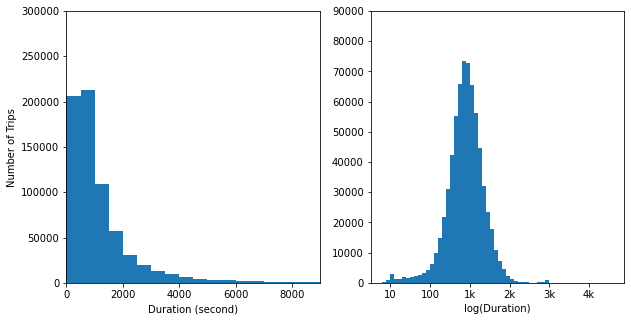

In [13]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_2020['duration_sec'].max()+500, 500)
plt.hist(df_2020['duration_sec'], bins = bin_edges, color=base_color)
plt.xlabel('Duration (second)')
plt.ylabel('Number of Trips')
plt.xlim(0, 9000)
plt.ylim(0, 300000);

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df_2020['duration_sec']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges, color=base_color)
plt.ylim(0, 90000);
plt.xticks([1, 2, 3, 4, 5, 6], ['10', '100', '1k', '2k', '3k', '4k'])
plt.xlabel('log(Duration)');

### Q2: What is the proportion of subscribers vs random customers?

**Bar chart:**
Barchart was selected to present the proportion of subscibers and radom customers with proper percentage showing on both bars.

**Observation 2:**
It is observed that from the total trips from Apr to Aug 2020, there are 40.5% (around 280000) of users are members under subscription and 59.5% (around 400000) are casual customers. And from there, I compared the distribution of subscribers and casual customers as of Apr to Aug 2019, noticed there is a drop in both overall subscription and casual customer, there are 82.9% (more than 800000) subscribers and 17.1% (less than 200000) casual customers. This situation can be explained by the current pandemic situtationm, people generally reduced their trip to go outdoor and the number of subscription also dropped. 

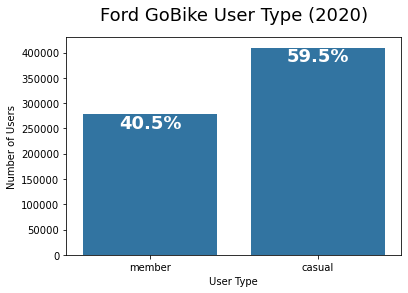

In [14]:
# create the plot
base_color = sns.color_palette()[0]
order = ['member', 'casual']
sns.countplot(data = df_2020, x = 'member_casual', color = base_color, order=order)

# add annotations
n_points = df_2020.shape[0]
cat_counts = df_2020['member_casual'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Ford GoBike User Type (2020)', fontsize=18).set_position([.5, 1.05]);

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, color = 'w', fontsize=18, 
             horizontalalignment='center', verticalalignment='top',fontweight='bold')

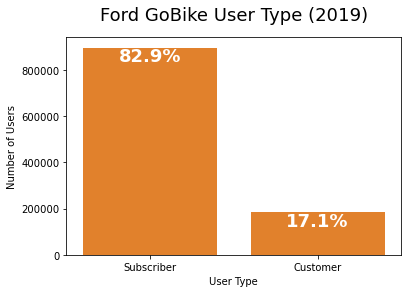

In [15]:
# create the plot
base_color = sns.color_palette()[1]
order = ['Subscriber', 'Customer']
sns.countplot(data = df_2019, x = 'user_type', color = base_color, order=order)

# add annotations
n_points = df_2019.shape[0]
cat_counts = df_2019['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Ford GoBike User Type (2019)', fontsize=18).set_position([.5, 1.05]);

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, color = 'w', fontsize=18, 
             horizontalalignment='center', verticalalignment='top',fontweight='bold')

### Q3: Which month, weekday and hour produces the most frequent trips?

**Bar chart:**
Barchart was selected to demonstrate the trend of monthly, weekly and hourly number of trips.

**Observation 3:**
Based on the following 3 barcharts, the highest number of trips appeared at June 2020 and weekends (Saturday and Sunday) attracted more users. Moreover, throughout the day, the number of trips increased steadily from 7am to 5pm and reached to the peak at 5pm, but it dropped rapidily after 5pm. The findings fit the current lifestyle, most of us are work from home and only went outdoor during weekends, and there is no morning peak hour.

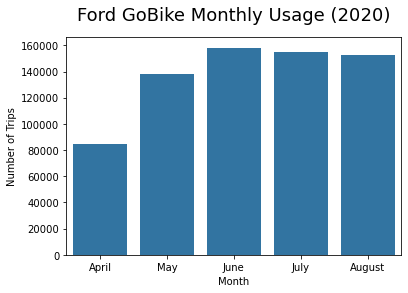

In [16]:
base_color = sns.color_palette()[0]
sns.countplot(data = df_2020, x = 'start_month', color = base_color);
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Ford GoBike Monthly Usage (2020)', fontsize=18).set_position([.5, 1.05]);

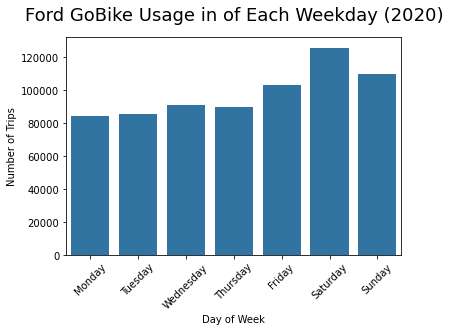

In [17]:
base_color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data = df_2020, x = 'start_week', color = base_color, order=order);
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 45)
plt.title('Ford GoBike Usage in of Each Weekday (2020)', fontsize=18).set_position([.5, 1.05]);

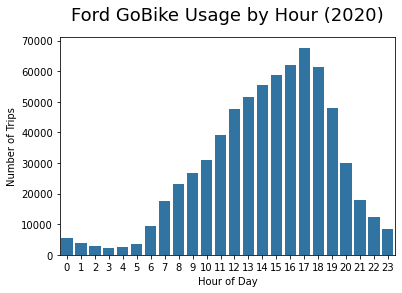

In [18]:
base_color = sns.color_palette()[0]
sns.countplot(data = df_2020, x = 'start_hour', color = base_color);
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Ford GoBike Usage by Hour (2020)', fontsize=18).set_position([.5, 1.05]);

### 3.2 Bivariate Exploration


### Q4: Compare with 2019, what is the difference in trend of number of trips from subscribers and casual users?

**Categorical Bar chart:**
The categorical bar charts will be used to show the different trend of weekly and hourly number of trips in both 2019 and 2020.

**Observation 4:**
Compare with 2020, the trend of number of trips during a week in 2019 is completely opposite. From last observation, in 2020, users tended to be more active during weekends and the trend applied to casual users. However, for subscribers or members, the number of trips spread quite evenly in each day of week. On contrast, subscribers in 2019 generate most of the trips and they are more active during Monday to Friday. But during weekends, the number of trips dropped by 50%. In addtion, trips made by casual users were evenly spreaded out in each day of week.


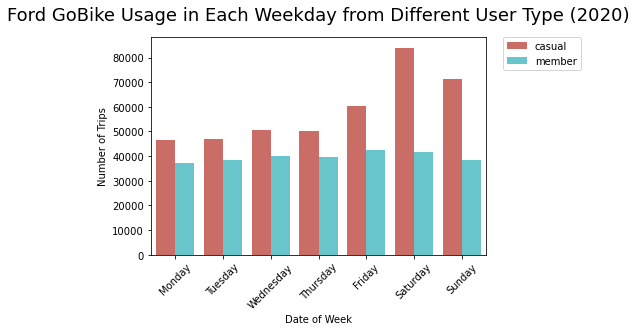

In [19]:
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data = df_2020, x = 'start_week', hue = 'member_casual',palette='hls', order = order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 45)
plt.title('Ford GoBike Usage in Each Weekday from Different User Type (2020)', fontsize=18).set_position([.5, 1.05]);

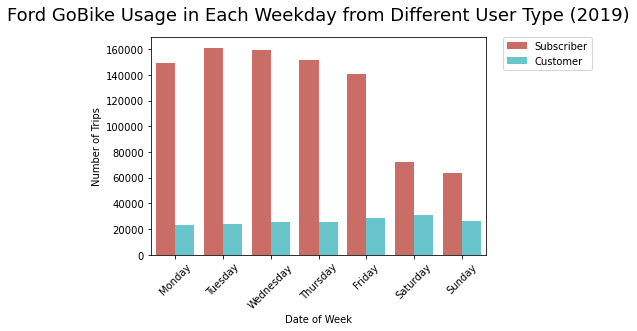

In [20]:
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data = df_2019, x = 'start_week', hue = 'user_type',palette='hls', order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 45)
plt.title('Ford GoBike Usage in Each Weekday from Different User Type (2019)', fontsize=18).set_position([.5, 1.05]);

**Observation 5:**
For the trend in trips made in different hour of the day, peak bike sharing usage in the morning (8am) and evening (5pm) hour in 2019 described the routine lifestyle, leaving for work in the morning and heading back home in the evening. Trips are mostly produced by subscribers, but this trend also fits casual users. According to last observation, peak hour of the trips increased steadily from 7am to 5pm, and reached to the peak at 5pm. Such trend applies to both subscribers and casual users. 

The changes in user behavior perfectly explained the trend of workstyle and lifestyle during this special period of time. Morning and evening peak hour travelling to and from work is not mandatory for now, also noticed that there are more and more people purchased their own bike during the pandemic situation as outdoor sport activities after work. 

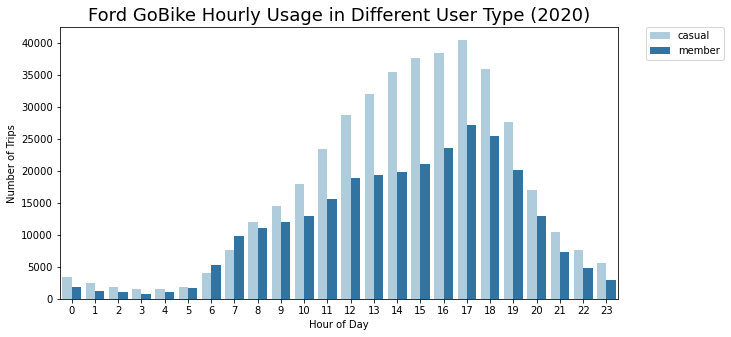

In [21]:
plt.figure(figsize = [10, 5])
sns.countplot(data = df_2020, x = 'start_hour', hue = 'member_casual',palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 0)
plt.title('Ford GoBike Hourly Usage in Different User Type (2020)', fontsize=18);

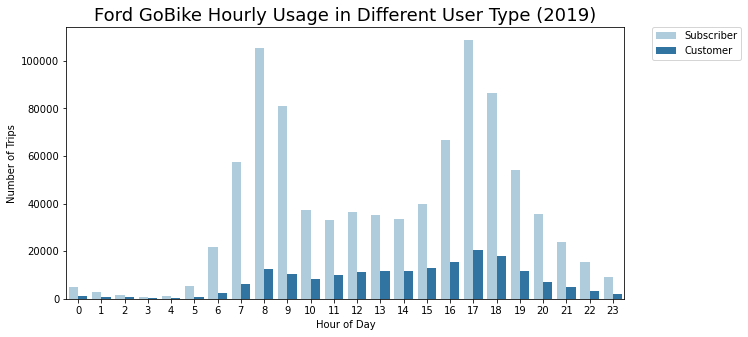

In [22]:
plt.figure(figsize = [10, 5])
sns.countplot(data = df_2019, x = 'start_hour', hue = 'user_type',palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 0)
plt.title('Ford GoBike Hourly Usage in Different User Type (2019)', fontsize=18);

### Q5: What is the trip duration (second) for subscribers (member) and casual users (casual)?
**Box Plot:** The box plot is adopted here to illustrate there different trip duration in the group of subscribers and casual users.

**Observation 6:** It can be observed from the box plot that casual users have longer trip duration compares with subscribers, ranging from 500 to 1500 seconds; subscribed users generally have trip duration of 400 to 1200 seconds. This might due to the fact that there are 59.5% of casual users over 40.5% subscribers.

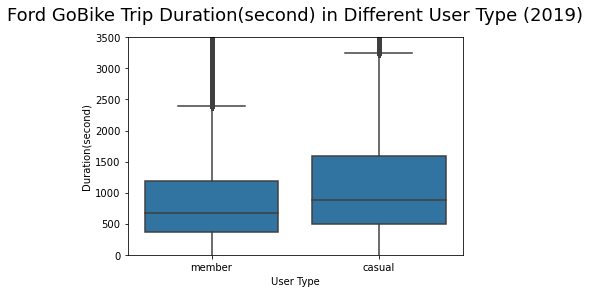

In [23]:
base_color = sns.color_palette()[0]
order = ['member', 'casual']
sns.boxplot(data = df_2020, x = 'member_casual', y = 'duration_sec', color = base_color, order=order)
plt.ylim([0, 3500])
plt.xlabel('User Type')
plt.ylabel('Duration(second)')
plt.title('Ford GoBike Trip Duration(second) in Different User Type (2019)', fontsize=18).set_position([.5, 1.05]);

### Q6: What is the trip distance (km) for subscribers (member) and casual users (casual)?
**Observation 7:** From the box plot, the pattern of users' travelling distance in susbcriber and casual users are quite similar, from 1km to 3km. 

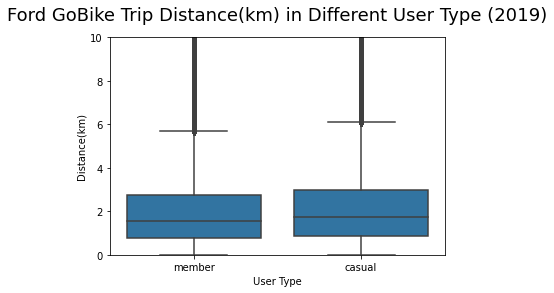

In [24]:
base_color = sns.color_palette()[0]
order = ['member', 'casual']
sns.boxplot(data = df_2020, x = 'member_casual', y = 'dist', color = base_color, order=order)
plt.ylim([0, 10])
plt.xlabel('User Type')
plt.ylabel('Distance(km)')
plt.title('Ford GoBike Trip Distance(km) in Different User Type (2019)', fontsize=18).set_position([.5, 1.05]);

### 3.3 Multivariate Exploration

### Q7: What is the relationship between trip duration and distance for subscribers (member) and casual users (casual)?
**Scatter Plot:** The scatter plot was used to present the relationship between trip duration(hour) and distance(km) as both of them are numerical variables.

**Observation 8:** Interestingly, it seems like there is no positive correlation between duration and distance in both subscriber and casual users. It can be observed that most of the users' trip distance is within 12.5 km and trip duration is within 4 hours. More information about users profile is needed, such as age group or gender to further the analysis. 

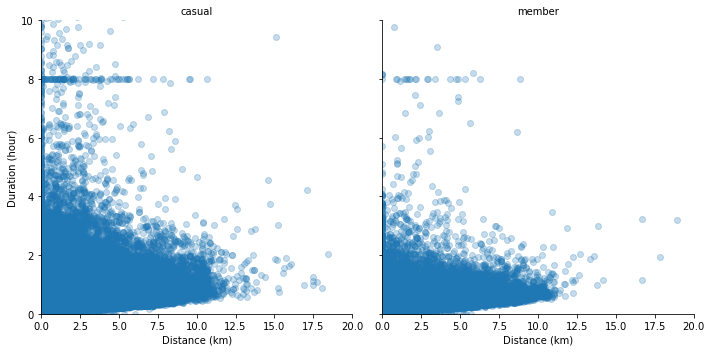

In [25]:
g = sns.FacetGrid(data = df_2020, col = 'member_casual', col_wrap = 2, height = 5,
                 xlim = [0, 20], ylim = [0, 10])
g.map(plt.scatter, 'dist', 'duration_hour', alpha=0.25)
g.set_titles("{col_name}", fontsize=18)
g.set_xlabels('Distance (km)')
g.set_ylabels('Duration (hour)');

### Q8: What is users' overall trip pattern for subscribers (member) and casual users (casual)?
**Heat map:** Heat map is more visually representitive to show the overall patterns of users in terms of time and week of the day.

**Observation 9:** It is known that,  there are more For susbcribed members, the trip demand is highly densed from 7am to 8pm over each weekday, however, for casual users, they are more active on weekends, from 10am to 7pm. 

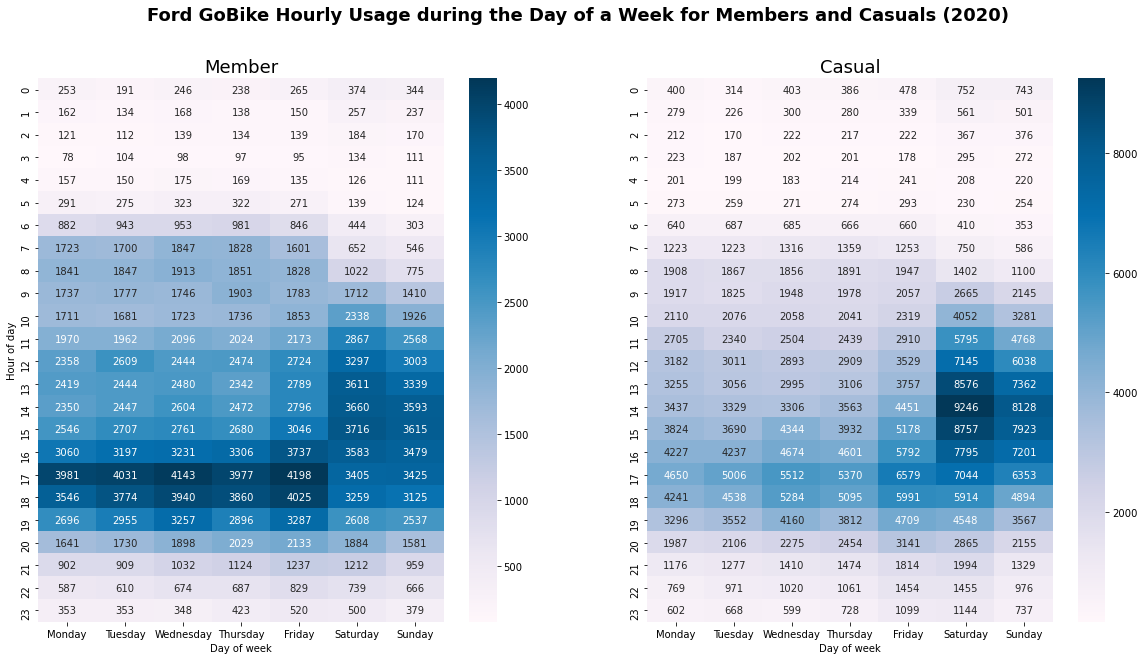

In [26]:
plt.figure(figsize=(20,10))
plt.suptitle('Ford GoBike Hourly Usage during the Day of a Week for Members and Casuals (2020)', fontsize=18, fontweight='semibold')
df_2020['start_week'] = pd.Categorical(df_2020['start_week'], 
                                                categories=['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                            'Saturday', 'Sunday'], ordered=True)
# generate heatmap for subscriber
plt.subplot(1, 2, 1)
df_member = df_2020.query('member_casual == "member"').groupby(['start_hour', 'start_week'])['ride_id'].size().reset_index()
df_member = df_member.pivot('start_hour', 'start_week', 'ride_id')
sns.heatmap(df_member, cmap='PuBu', annot=True, fmt="d")

plt.title('Member', fontsize=18)
plt.xlabel('Day of week')
plt.ylabel('Hour of day')

# generate heatmap for casual customer
plt.subplot(1, 2, 2)
df_casual = df_2020.query('member_casual == "casual"').groupby(['start_hour', 'start_week'])['ride_id'].size().reset_index()
df_casual = df_casual.pivot('start_hour', 'start_week', 'ride_id')
sns.heatmap(df_casual, cmap='PuBu', annot=True, fmt="d")

plt.title('Casual', fontsize=18)
plt.xlabel('Day of week')
plt.ylabel('');

### Q9: What is users' overall demand pattern for electric bike and docked bike?

**Observation 10:** Overally, there are higher usage for electric bike over docked bike, but from 10am to 7pm, both electric bike and docked bike showed more densed user trip, which means higher demand in the period of time. This pattern also overlap with the previous observation of trip trend thoughout the day, the number of trips increased from 7am to 5pm and reached the peak.

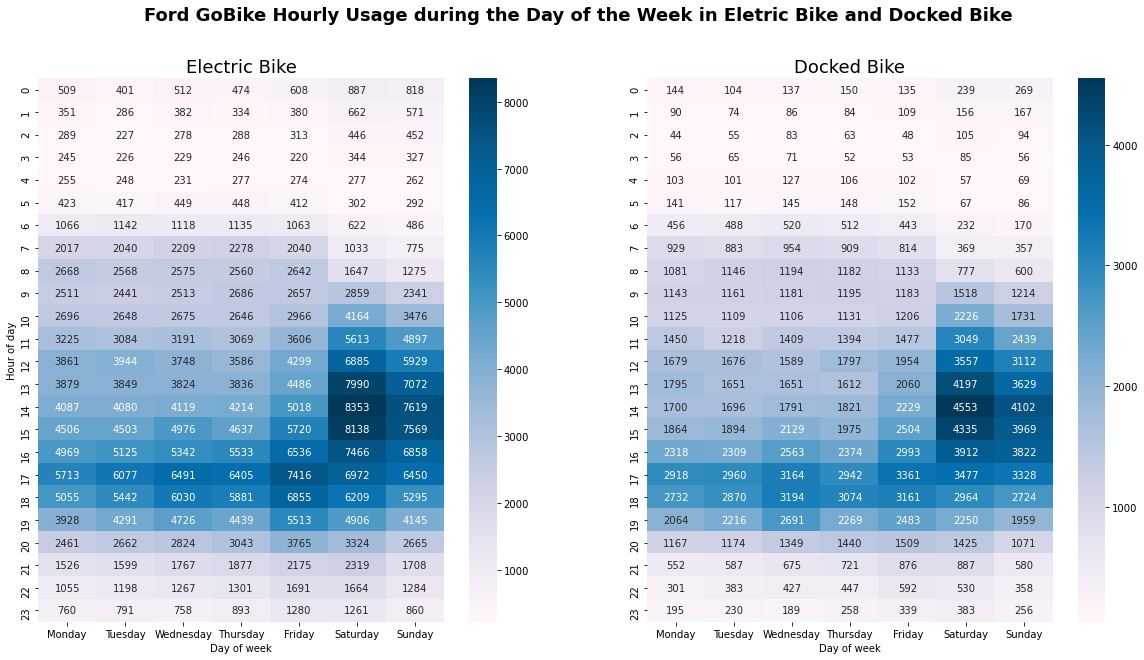

In [27]:
plt.figure(figsize=(20,10))
plt.suptitle('Ford GoBike Hourly Usage during the Day of the Week in Eletric Bike and Docked Bike', fontsize=18, fontweight='semibold')
df_2020['start_week'] = pd.Categorical(df_2020['start_week'], 
                                                categories=['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                            'Saturday', 'Sunday'], ordered=True)
# generate heatmap for electric bike
plt.subplot(1, 2, 1)
df_ele = df_2020.query('rideable_type == "electric_bike"').groupby(['start_hour', 'start_week'])['ride_id'].size().reset_index()
df_ele = df_ele.pivot('start_hour', 'start_week', 'ride_id')
sns.heatmap(df_ele, cmap='PuBu', annot=True, fmt="d")

plt.title('Electric Bike', fontsize=18)
plt.xlabel('Day of week')
plt.ylabel('Hour of day')

# generate heatmap for docked bike
plt.subplot(1, 2, 2)
df_dock = df_2020.query('rideable_type == "docked_bike"').groupby(['start_hour', 'start_week'])['ride_id'].size().reset_index()
df_dock = df_dock.pivot('start_hour', 'start_week', 'ride_id')
sns.heatmap(df_dock, cmap="PuBu",annot=True, fmt="d")

plt.title('Docked Bike', fontsize=18)
plt.xlabel('Day of week')
plt.ylabel('');

## 4. Summary of Main Findings


Through the data exploration of Ford GoBike's system data collected from Apr to Aug 2020, some meaningful insights are uncovered:

1. Overally, trip duration of users is within 30 minutes, due to the pricing method of Ford GoBike.


2. From Apr to Aug 2020, there are 40.5% (around 280000) of users are members under subscription and 59.5% (around 400000) are casual customers. But in the same period of 2019, there are 82.9% (more than 800000) subscribers and 17.1% (less than 200000) casual customers.


3. The highest number of trips appeared at June 2020 and especially during weekends (Saturday and Sunday), it attracted more users. Throughout the day, the number of trips increased steadily from 7am to 5pm and reached to the peak at 5pm, but it dropped rapidily after 5pm.


4. In 2020, users tended to be more active during weekends and the trend applied largely to casual users. However, for subscribers or members, the number of trips spread quite evenly in each day of week. On contrast, subscribers in 2019 generate most of the trips and they are more active during Monday to Friday. But during weekends, the number of trips dropped by 50%. In addtion, trips made by casual users were evenly spreaded out in each day of week.


5. Casual users have longer trip duration compares with subscribers, ranging from 500 to 1500 seconds; subscribed users generally have trip duration of 400 to 1200 seconds. 


6. For the trend in trips made in different hour of the day, peak bike sharing usage in the morning (8am) and evening (5pm) hour in 2019. Trips are mostly produced by subscribers, but this trend also fits casual users.


7. The pattern of users' travelling distance in susbcriber and casual users are quite similar, from 1km to 3km.


8. No positive correlation between duration and distance in both subscriber and casual users was noticed. It can be observed that most of the users' trip distance is within 12.5 km and trip duration is within 4 hours.


9. The trip demand is highly densed from 7am to 8pm over each weekday, however, for casual users, they are more active on weekends, from 10am to 7pm.


10. Generally, there are higher usage for electric bike over docked bike, but from 10am to 7pm, both electric bike and docked bike showed more densed user trip, which means higher demand in the period of time. 

